# PyCSW

In [48]:
import requests
from xml.etree import ElementTree
from xml.dom import minidom

# ESA https://scihub.copernicus.eu/ https://sentinelsat.readthedocs.io/en/stable/index.html

# EUMETSAT https://www.eumetsat.int/access-our-data https://navigator.eumetsat.int/start

# MET https://colhub.met.no https://nbs.csw.met.no/ https://github.com/metno/data-management-handbook https://github.com/vkbo/SentinelTools

xml_string="""<?xml version="1.0" encoding="ISO-8859-1" standalone="no"?>
<csw:GetRecords
xmlns:csw="http://www.opengis.net/cat/csw/2.0.2"
xmlns:gml="http://www.opengis.net/gml"
xmlns:ogc="http://www.opengis.net/ogc"
xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
service="CSW"
version="2.0.2"
resultType="results"
maxRecords="10"
outputFormat="application/xml"
outputSchema="http://www.opengis.net/cat/csw/2.0.2"
xsi:schemaLocation="http://www.opengis.net/cat/csw/2.0.2
http://schemas.opengis.net/csw/2.0.2/CSW-discovery.xsd" >
    <csw:Query typeNames="csw:Record">
        <csw:ElementSetName>full</csw:ElementSetName>
        <csw:Constraint version="1.1.0">
            <ogc:Filter>
            <ogc:Intersects>
                <ogc:PropertyName>ows:BoundingBox</ogc:PropertyName>
                <gml:Polygon>
                    <gml:exterior>
                        <gml:LinearRing>
                            <gml:posList>
                                47.00 -5.00 55.00 -5.00 55.00 20.00 47.00 20.00 47.00 -5.00
                            </gml:posList>
                        </gml:LinearRing>
                    </gml:exterior>
                </gml:Polygon>
            </ogc:Intersects>
            </ogc:Filter>
        </csw:Constraint>
    </csw:Query>
</csw:GetRecords>
"""

xml_response = ElementTree.fromstring(requests.post('https://csw.s-enda.k8s.met.no', data=xml_string).text)
xml_response_string = ElementTree.tostring(xml_response, encoding='unicode')

reparsed = minidom.parseString(xml_response_string)
print(reparsed.toprettyxml())


<?xml version="1.0" ?>
<ns0:GetRecordsResponse xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.opengis.net/cat/csw/2.0.2" xmlns:ns3="http://purl.org/dc/terms/" xmlns:ns4="http://www.opengis.net/ows" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="2.0.2" xsi:schemaLocation="http://www.opengis.net/cat/csw/2.0.2 http://schemas.opengis.net/csw/2.0.2/CSW-discovery.xsd">
	<ns0:SearchStatus timestamp="2021-12-13T15:56:40Z"/>
	<ns0:SearchResults numberOfRecordsMatched="39451" numberOfRecordsReturned="10" nextRecord="11" recordSchema="http://www.opengis.net/cat/csw/2.0.2" elementSet="full">
		<ns0:Record>
			<dc:identifier>9d24925b-590a-4277-b471-67e87a5e94d0</dc:identifier>
			<dc:title>Direct Broadcast data processed in satellite swath to L1C.</dc:title>
			<dc:type>dataset</dc:type>
			<dc:subject>Earth Science &gt; Atmosphere &gt; Atmospheric radiation</dc:subject>
			<dc:subject>Government Agencies-non-US &gt; Norway &gt; NO/MET &gt; Norwegian Meteorologica

# sentinelsat

In [ ]:
# see https://sentinelsat.readthedocs.io/en/stable/index.html
# and the Sentinel user guide at https://sentinels.copernicus.eu/web/sentinel/user-guides

!pip install sentinelsat

In [4]:
# connect to the OData API
#
# save credentials for scihub.copernicus.eu in $HOME/.netrc like this:
#
# machine scihub.copernicus.eu
#   login <your username>
#   password <your password>
# machine colhub.met.no
#   login <your username>
#   password <your password>
#
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt, make_path_filter

local_api = SentinelAPI(None, None, "https://colhub.met.no")
api = SentinelAPI(None, None, "https://scihub.copernicus.eu/dhus")

In [5]:
# get full metadata for a specific product
api.get_product_odata('04548172-c64a-418f-8e83-7a4d148adf1e', full=True)

{'id': '04548172-c64a-418f-8e83-7a4d148adf1e',
 'title': 'S1A_IW_SLC__1SDV_20170425T155612_20170425T155639_016302_01AF91_46FF',
 'size': 4633501134,
 'md5': 'e5855d1c974171d33ee4bc08b9d221ae',
 'date': datetime.datetime(2017, 4, 25, 15, 56, 12, 814000),
 'footprint': 'POLYGON((34.322010 0.401648,36.540989 0.876987,36.884121 -0.747357,34.664474 -1.227940,34.322010 0.401648))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('04548172-c64a-418f-8e83-7a4d148adf1e')/$value",
 'Online': False,
 'Creation Date': datetime.datetime(2017, 4, 25, 19, 22, 0, 383000),
 'Ingestion Date': datetime.datetime(2017, 4, 25, 19, 23, 45, 956000),
 'Acquisition Type': 'NOMINAL',
 'Carrier rocket': 'Soyuz',
 'Cycle number': 107,
 'Date': datetime.datetime(2017, 4, 25, 15, 56, 12, 814000),
 'Filename': 'S1A_IW_SLC__1SDV_20170425T155612_20170425T155639_016302_01AF91_46FF.SAFE',
 'Footprint': '<gml:Polygon srsName="http://www.opengis.net/gml/srs/epsg.xml#4326" xmlns:gml="http://www.opengis.net/gml"

In [6]:
# Spatial locations
locations = [[4.4, 60.3],
             [3.4, 60.3],
             [3.4, 65.7]]

# Time interval
start_time = "2021-12-15T00:00:00.000Z"
end_time = "2021-12-15T23:59:59.000Z"


In [7]:
footprint_json = {
  "type": "Feature",
  "geometry": {
    "type": "MultiPoint",
    "coordinates": locations
  }
}
print(footprint_json)

{'type': 'Feature', 'geometry': {'type': 'MultiPoint', 'coordinates': [[4.4, 60.3], [3.4, 60.3], [3.4, 65.7]]}}


In [8]:
# search by polygon, time, and SciHub query keywords
footprint = geojson_to_wkt(footprint_json)
products = api.query(footprint,
                     date=(start_time, end_time),
                     producttype="GRD",
                     platformname="Sentinel-1")#,
                     #limit=1)#,
                     #cloudcoverpercentage=(0, 30))

# download all online results from the search
for product_id in list(products.keys()):
    if api.is_online(product_id):
        print("Product {} is online. Will download.".format(product_id))
    else:
        print("Product {} is offline. Will NOT download.".format(product_id))
        del products[product_id]
        #print(("Product {} is offline. Retrieval is triggered.".format(product_id))
        #api.trigger_offline_retrieval(product_id)



Product 8dbcfae2-6391-44e7-bd20-85d508fd226a is online. Will download.
Product 3c9bde10-d407-4798-a69c-e7a78391945f is online. Will download.
Product 6cb28d47-61b5-4500-b36c-ae5ad17b297e is online. Will download.
Product 3fc39c21-cd35-44c5-8e49-8cf57e8c10c2 is online. Will download.


In [9]:
path_filter = make_path_filter("*s1?-*-grd-vv-*.tiff")
api.download_all(products)#, nodefilter=path_filter)

# convert to Pandas DataFrame
products_df = api.to_dataframe(products)

# GeoJSON FeatureCollection containing footprints and metadata of the scenes
products_geojson = api.to_geojson(products)

# GeoPandas GeoDataFrame with the metadata of the scenes and the footprints as geometries
products_gdf = api.to_geodataframe(products)

# Get basic information about the product: its title, file size, MD5 sum, date, footprint and
# its download url
#api.get_product_odata(<product_id>)

# Get the product's full metadata available on the server
#api.get_product_odata(<product_id>, full=True)

In [10]:
products_gdf

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,missiondatatakeid,...,producttype,platformname,platformidentifier,instrumentname,instrumentshortname,productclass,polarisationmode,acquisitiontype,uuid,geometry
8dbcfae2-6391-44e7-bd20-85d508fd226a,S1B_IW_GRDH_1SDV_20211215T172816_20211215T1728...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-12-15T17:28:16.741Z, Instrument: SA...",false,2021-12-15 17:28:16.741,2021-12-15 17:28:41.741,2021-12-15 18:54:06.208,235062,...,GRD,Sentinel-1,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,8dbcfae2-6391-44e7-bd20-85d508fd226a,"MULTIPOLYGON (((-1.56682 64.30047, 0.00000 64...."
3c9bde10-d407-4798-a69c-e7a78391945f,S1B_IW_GRDH_1SDV_20211215T172701_20211215T1727...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-12-15T17:27:01.741Z, Instrument: SA...",false,2021-12-15 17:27:01.741,2021-12-15 17:27:26.740,2021-12-15 18:30:07.915,235062,...,GRD,Sentinel-1,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,3c9bde10-d407-4798-a69c-e7a78391945f,"MULTIPOLYGON (((0.69485 59.86583, 5.39301 60.3..."
6cb28d47-61b5-4500-b36c-ae5ad17b297e,S1B_IW_GRDH_1SDV_20211215T061027_20211215T0610...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-12-15T06:10:27.599Z, Instrument: SA...",false,2021-12-15 06:10:27.599,2021-12-15 06:10:52.598,2021-12-15 07:30:07.656,235007,...,GRD,Sentinel-1,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,6cb28d47-61b5-4500-b36c-ae5ad17b297e,"MULTIPOLYGON (((7.45623 65.04003, 8.38646 66.5..."
3fc39c21-cd35-44c5-8e49-8cf57e8c10c2,S1B_IW_GRDH_1SDV_20211215T061207_20211215T0612...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-12-15T06:12:07.598Z, Instrument: SA...",false,2021-12-15 06:12:07.598,2021-12-15 06:12:32.597,2021-12-15 07:27:04.535,235007,...,GRD,Sentinel-1,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,3fc39c21-cd35-44c5-8e49-8cf57e8c10c2,"MULTIPOLYGON (((4.42944 59.12788, 5.10282 60.6..."


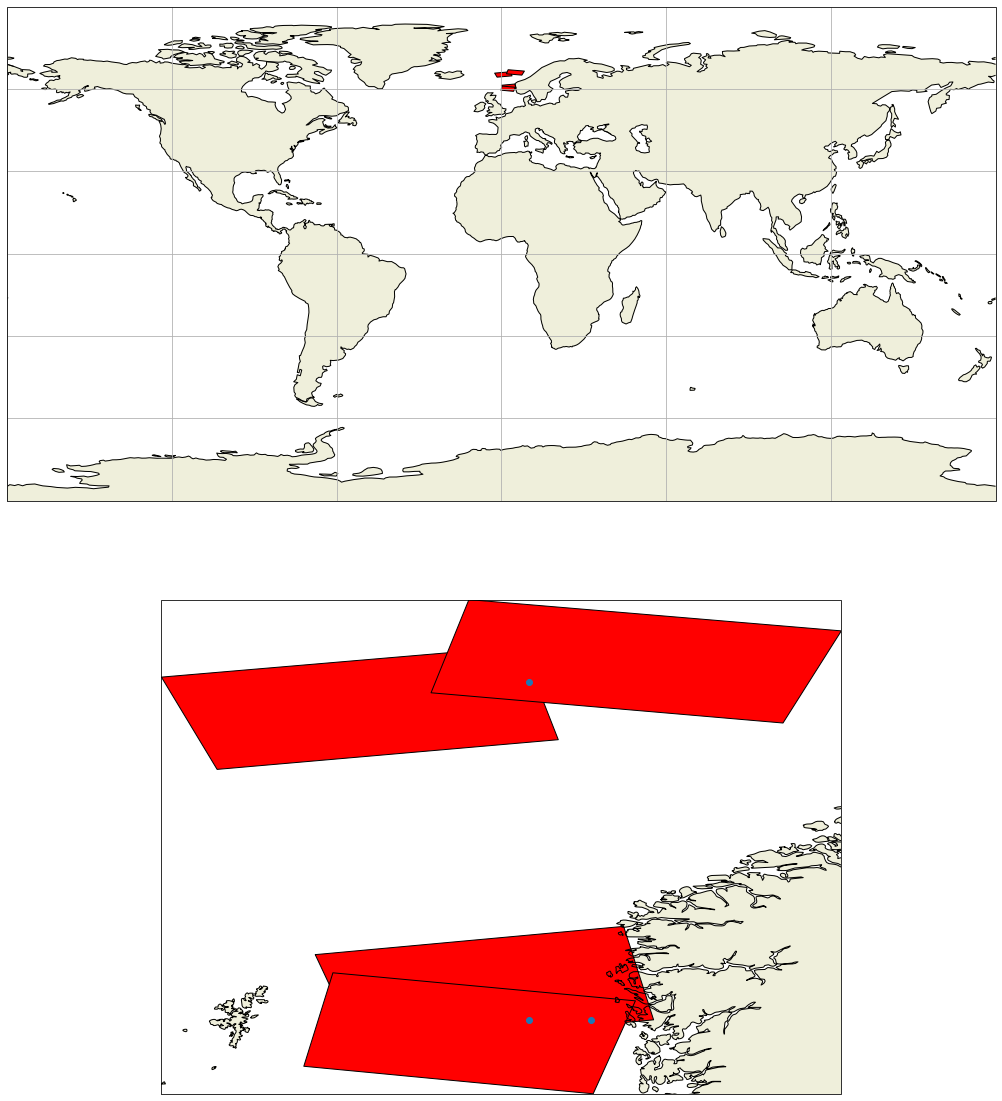

In [11]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

import numpy as np

fig = plt.figure(figsize=(20, 20))

bounds = products_gdf.total_bounds

ax1 = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax1.gridlines()
ax1.add_geometries(products_gdf.geometry, crs = ccrs.PlateCarree(), facecolor='red', edgecolor='k')
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.COASTLINE)

ax2 = plt.subplot(2, 1, 2, projection=ccrs.PlateCarree())
ax2.add_geometries(products_gdf.geometry, crs = ccrs.PlateCarree(), facecolor='red', edgecolor='k')
ax2.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]], ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.COASTLINE)

locations_np = np.array(locations)
locs_x, locs_y = locations_np.T
ax2.scatter(locs_x, locs_y, transform=ccrs.PlateCarree(), zorder=2)

plt.show()

# pytroll

In [16]:
# see http://pytroll.github.io/

!pip install satpy rioxarray rasterio

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.1 MB 3.2 MB/s            
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     |████████████████████████████████| 46 kB 1.4 MB/s             
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     |████████████████████████████████| 19.2 MB 326 kB/s            
     |████████████████████████████████| 42 kB 1.2 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 1.0 MB 5.0 MB/s            
     |████████████████████████████████| 3.5 MB 3.7 MB/s            
     |████████████████████████████████| 845 kB 5.6 MB/s            
     |████████████████████████████████| 231 kB 5.7 MB/s            
     |████████████████████████████████| 146 kB 6.4 MB/s            

In [32]:
from satpy.utils import check_satpy

check_satpy()

Readers
abi_l1b:  ok
abi_l1b_scmi:  ok
abi_l2_nc:  ok
acspo:  cannot find module 'satpy.readers.acspo' (No module named 'netCDF4')
agri_l1:  cannot find module 'satpy.readers.agri_l1' (No module named 'h5py')
ahi_hrit:  ok
ahi_hsd:  ok
ahi_l1b_gridded_bin:  ok
ami_l1b:  cannot find module 'satpy.readers.ami_l1b' (No module named 'pyspectral')
amsr2_l1b:  cannot find module 'satpy.readers.amsr2_l1b' (No module named 'h5py')
amsr2_l2:  cannot find module 'satpy.readers.amsr2_l2' (No module named 'h5py')
amsr2_l2_gaasp:  ok
amsub_l1c_aapp:  ok
ascat_l2_soilmoisture_bufr:  cannot find module 'satpy.readers.ascat_l2_soilmoisture_bufr' (('Missing eccodes-python and/or eccodes C-library installation. Use conda to install eccodes.\n           Error: ', ModuleNotFoundError("No module named 'eccodes'")))
avhrr_l1b_aapp:  ok
avhrr_l1b_eps:  ok
avhrr_l1b_gaclac:  cannot find module 'satpy.readers.avhrr_l1b_gaclac' (No module named 'pygac')
avhrr_l1b_hrpt:  cannot find module 'satpy.readers.hrpt' (

In [12]:
from satpy import Scene, find_files_and_readers
from datetime import datetime
import zipfile
from os import path
import glob

for product_name in products_gdf.title:
    break
    zip_filename = "{}.zip".format(product_name)
    safe_dir_name = "{}.SAFE".format(product_name)

    if not path.exists(safe_dir_name):
        with zipfile.ZipFile(zip_filename,"r") as zip_ref:
            zip_ref.extractall(".")

# XXX: not sure if all products should be in the same base_dir, as this
#      will cause all products to be loaded when constructing the Scene object

files = find_files_and_readers(
    base_dir=".",
    reader="sar-c_safe")

In [17]:
from satpy.dataset import DataQuery

scn = Scene(filenames=files)

scn.available_dataset_names()
scn.available_composite_names()

['sar-ice',
 'sar-ice-iw',
 'sar-ice-legacy',
 'sar-ice-log',
 'sar-ice-log-iw',
 'sar-land',
 'sar-land-iw',
 'sar-quick',
 'sar-rgb']

In [14]:
vh_id = DataQuery(name="measurement", polarization="vh")
scn.load([vh_id])
scn[vh_id]

ERROR 1: PROJ: proj_create_from_database: ellipsoid not found
ERROR 1: PROJ: proj_create_from_database: ellipsoid not found
ERROR 1: PROJ: proj_create_from_database: ellipsoid not found
ERROR 1: PROJ: proj_create_from_database: ellipsoid not found


<xarray.DataArray (y: 16678, x: 26733)>
dask.array<clip, shape=(16678, 26733), dtype=float64, chunksize=(4096, 4096), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) int64 0 1 2 3 4 5 6 ... 16672 16673 16674 16675 16676 16677
  * x            (x) int64 0 1 2 3 4 5 6 ... 26727 26728 26729 26730 26731 26732
    band         int64 1
    spatial_ref  int64 0
    crs          object +proj=latlong +datum=WGS84 +ellps=WGS84 +type=crs
Attributes:
    name:                 measurement
    sensor:               sar-c
    wavelength:           [5.4, 5.405, 5.41]
    resolution:           80
    polarization:         vh
    calibration:          gamma
    quantity:             natural
    coordinates:          ('longitude', 'latitude')
    file_type:            safe_measurement
    standard_name:        backscatter
    units:                1
    modifiers:            ()
    platform_name:        s1b
    start_time:           2021-12-15 06:10:27
    end_time:             2021-12-15 06:10:52
    reader:               sar-c_safe
    area:                 Shape: (16678, 26733)\nLons: <xarray.DataArray 'int...
    _satpy_id:            DataID(name='measurement', polarization='vh', resol...
    ancillary_variables:  []

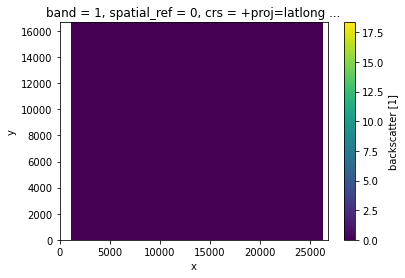

In [16]:
# To save as Geotiff (including the GCPs):
#scn.save_dataset(vh_id)

# XXX: Takes forever... investigate further
scn[vh_id].plot.imshow()

# XXX: Check out https://python-kurs.github.io/sommersemester_2019/units/S01E06.html 
# and https://nbviewer.org/github/pytroll/pytroll-examples/ for inspiration